In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = 'D:\Dokumenty\Komputry\Python\datasets\zgony.csv'
df = pd.read_csv(data, 
                 encoding='cp1250',
                 sep=';',
                 parse_dates=['data_rap_zgonu'],
                 index_col='data_rap_zgonu'
                )

In [76]:
# convert dtypes
df = df.convert_dtypes()
df['teryt_woj'] = df['teryt_woj'].astype('Int16')
df['teryt_pow'] = df['teryt_pow'].astype('Int16')
df['wiek'] = df['wiek'].astype('Int8')

In [77]:
# rename columns and drop columns
df = (df.rename(columns={'teryt_woj':'woj', 
                   'teryt_pow':'pow',
                   'plec':'sex',
                   'wiek':'age',
                   'czy_wspolistniejace':'comorbidities',
                   'obniz_odpornosc':'weak_res',
                   'liczba_zaraportowanych_zgonow':'rep_deaths',
                   'w_pelni_zaszczepiony':'full_vax'
                  })
      .drop(columns=['kat_wiek', 'producent', 'dawka_ost'])
     )
df.index.name = 'dt'

In [78]:
# replace value coding
df['sex'] = df['sex'].replace('K','w').str.lower()

for col in ['sex','comorbidities','weak_res','full_vax']:
    df[col] = df[col].replace('T','Y').str.lower()

In [123]:
df.head()

,woj,pow,sex,age,comorbidities,weak_res,rep_deaths,full_vax
dt,,,,,,,,
2021-01-02,4,407,w,67,y,n,1,n
2021-01-02,4,407,w,90,y,n,1,n
2021-01-02,4,407,m,69,y,n,1,n
2021-01-02,4,415,m,72,y,n,1,n
2021-01-02,4,415,m,77,y,n,1,n


In [130]:
# deaths daily (7-day avg)
df_7_d_w = (df[df['sex']=='w']['rep_deaths']
    .groupby(['dt'])
    .sum()
    .rolling(window=7)
    .mean()
         )

df_7_d_m = (df[df['sex']=='m']['rep_deaths']
    .groupby(['dt'])
    .sum()
    .rolling(window=7)
    .mean()
         )

In [131]:
df_7_d_w

dt
2021-01-02           NaN
2021-01-03           NaN
2021-01-04           NaN
2021-01-05           NaN
2021-01-06           NaN
                 ...    
2021-12-24    204.000000
2021-12-25    201.857143
2021-12-26    202.714286
2021-12-27    204.142857
2021-12-28    204.714286
Name: rep_deaths, Length: 323, dtype: float64

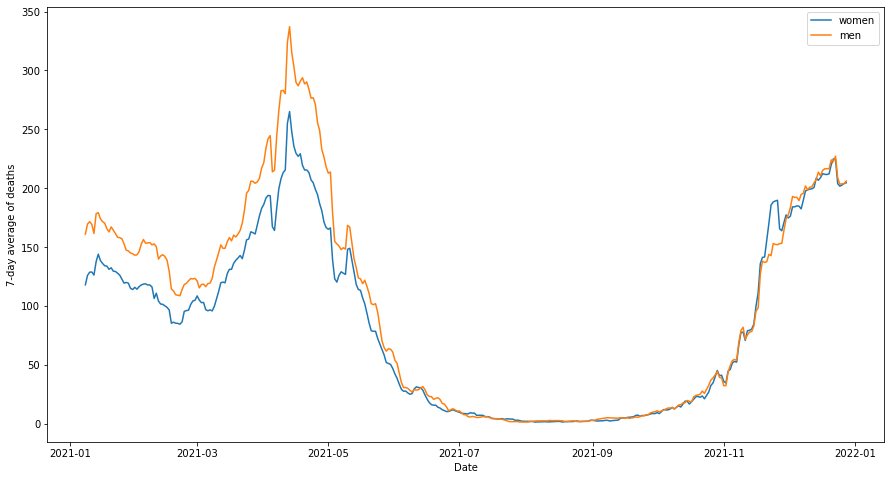

In [134]:
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(df_7_d_w.index, df_7_d_w, label='women')
ax.plot(df_7_d_m.index, df_7_d_m, label='men')

ax.set_xlabel("Date")
ax.set_ylabel("7-day average of deaths")
ax.legend()

plt.show()

In [21]:
df[df['w_pelni_zaszczepiony']=='N'].sort_values('w_pelni_zaszczepiony',ascending=True).head(20)

,data_rap_zgonu,teryt_woj,teryt_pow,plec,wiek,kat_wiek,czy_wspolistniejace,producent,dawka_ost,obniz_odpornosc,liczba_zaraportowanych_zgonow,w_pelni_zaszczepiony
0,2021-01-02,4,407,K,67,65-74,T,<NA>,<NA>,N,1,N
40044,2021-05-08,24,2401,M,53,45-54,T,<NA>,<NA>,N,1,N
40045,2021-05-08,24,2404,K,67,65-74,T,<NA>,<NA>,N,1,N
40046,2021-05-08,24,2406,M,84,75-84,T,<NA>,<NA>,N,1,N
40047,2021-05-08,24,2408,K,74,65-74,T,<NA>,<NA>,N,1,N
40048,2021-05-08,24,2408,K,82,75-84,T,<NA>,<NA>,N,1,N
40049,2021-05-08,24,2408,M,62,55-64,T,<NA>,<NA>,N,1,N
40050,2021-05-08,24,2410,K,67,65-74,T,<NA>,<NA>,N,1,N
40051,2021-05-08,24,2464,M,72,65-74,T,<NA>,<NA>,N,1,N
40052,2021-05-08,24,2465,K,62,55-64,T,<NA>,<NA>,N,1,N


In [43]:
df['data_rap_zakazenia'].apply(pd.to_datetime)

0         2021-12-28
1         2021-12-28
2         2021-12-28
3         2021-12-28
4         2021-12-28
             ...    
2159973   2021-01-01
2159974   2021-01-01
2159975   2021-01-01
2159976   2021-01-01
2159977   2021-01-01
Name: data_rap_zakazenia, Length: 2159978, dtype: datetime64[ns]

In [46]:
df = df.set_index('data_rap_zakazenia')

In [52]:
df.loc['2021-12-28']

,teryt_woj,teryt_pow,plec,wiek,kat_wiek,producent,dawka_ost,obniz_odpornosc,liczba_zaraportowanych_zakazonych
data_rap_zakazenia,,,,,,,,,
2021-12-28,2.0,201.0,K,0.0,BD,NaN,NaN,0,1
2021-12-28,2.0,201.0,K,14.0,0-18,NaN,NaN,0,1
2021-12-28,2.0,201.0,K,24.0,19-24,Johnson&Johnson,pelna_dawka,0,1
2021-12-28,2.0,201.0,K,26.0,25-34,NaN,NaN,0,1
2021-12-28,2.0,201.0,K,28.0,25-34,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...
2021-12-28,NaN,NaN,nieznana,35.0,35-44,NaN,NaN,0,1
2021-12-28,NaN,NaN,nieznana,36.0,35-44,NaN,NaN,0,1
2021-12-28,NaN,NaN,nieznana,43.0,35-44,NaN,NaN,0,1
